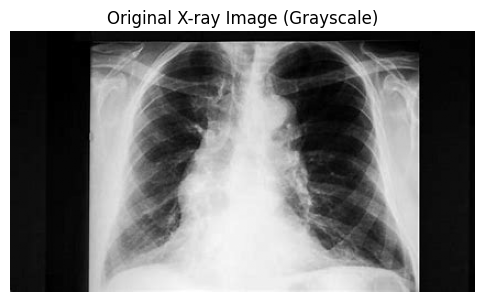

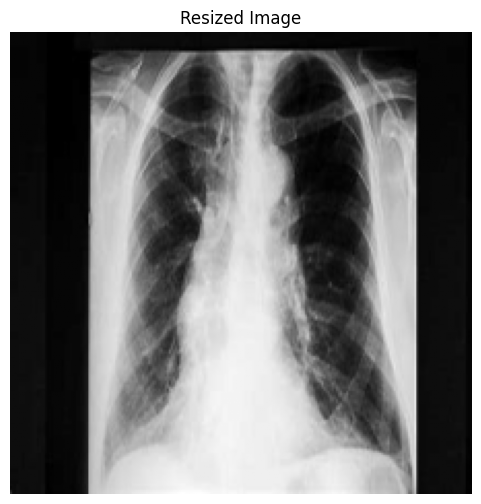

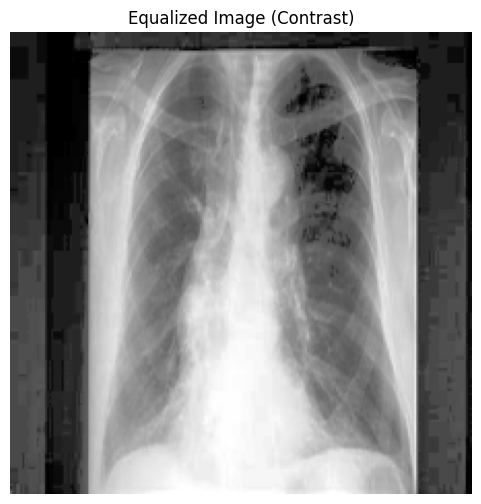

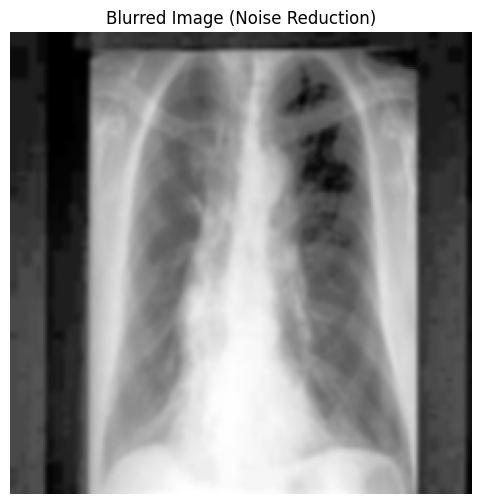

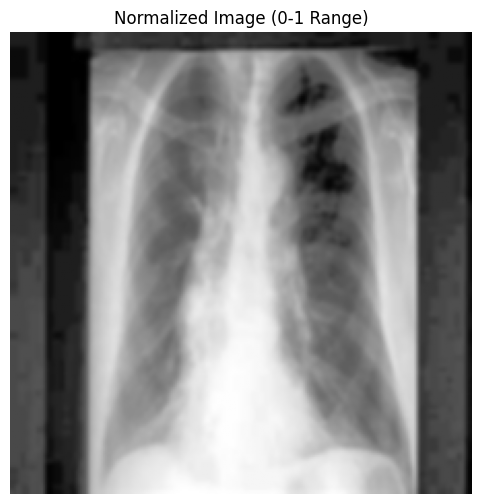

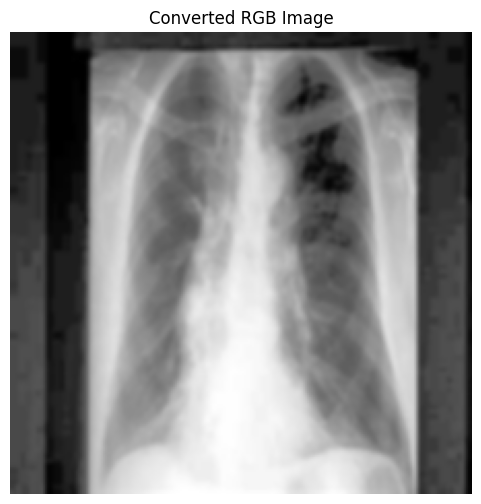

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Disease: Normal


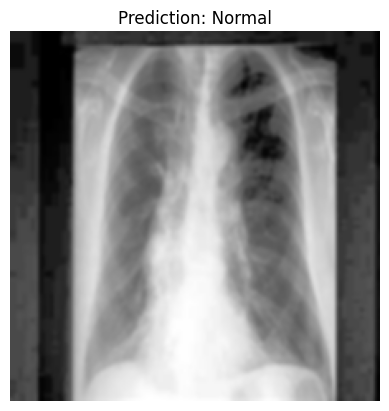

In [ ]:
!pip install tensorflow opencv-python matplotlib
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to display images at each step
def show_image(title, img):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Load the X-ray image (in grayscale)
img = cv2.imread('OIP.jpg', cv2.IMREAD_GRAYSCALE)
show_image("Original X-ray Image (Grayscale)", img)

# Step 2: Resize the image (224x224 pixels)
img_resized = cv2.resize(img, (224, 224))
show_image("Resized Image", img_resized)

# Step 3: Histogram Equalization (Contrast improvement)
img_equalized = cv2.equalizeHist(img_resized)
show_image("Equalized Image (Contrast)", img_equalized)

# Step 4: Noise reduction using Gaussian Blur
img_blurred = cv2.GaussianBlur(img_equalized, (5, 5), 0)
show_image("Blurred Image (Noise Reduction)", img_blurred)

# Step 5: Normalize the image (scaled to [0, 1] range)
img_normalized = img_blurred / 255.0
show_image("Normalized Image (0-1 Range)", img_normalized)

# Step 6: Convert grayscale to RGB (pre-trained models expect 3-channel input)
# Convert to uint8 (0-255 range) before converting to RGB
img_normalized_uint8 = np.uint8(img_normalized * 255)

# Convert grayscale to RGB
img_rgb = cv2.cvtColor(img_normalized_uint8, cv2.COLOR_GRAY2RGB)
show_image("Converted RGB Image", img_rgb)

# Step 7: Add batch dimension (for model input)
img_input = np.expand_dims(img_rgb, axis=0)  # shape (1, 224, 224, 3)

# Step 8: Load pre-trained model (DenseNet121 for general classification)
# You can replace this with your own model or use a fine-tuned one for specific diseases
model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers for your task
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)  # 4 classes: Normal, Pneumonia, Fracture, Tumor
final_model = tf.keras.models.Model(inputs=model.input, outputs=x)

# Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 9: Make predictions with the AI model
predictions = final_model.predict(img_input)

# Map predictions to labels
labels = ['Normal', 'Pneumonia', 'Fracture', 'Tumor']
predicted_class = labels[np.argmax(predictions)]

print(f"Predicted Disease: {predicted_class}")

# Step 10: Visualize the X-ray image with the prediction label
plt.imshow(img_rgb)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()



In [ ]:
import cv2

# Load images
img1 = cv2.imread('xray_image1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('xray_image2.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Match descriptors using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)

# Draw matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2.imshow('ORB Matches', img_matches)
cv2.waitKey(0)


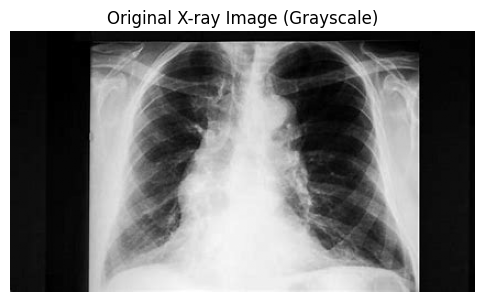

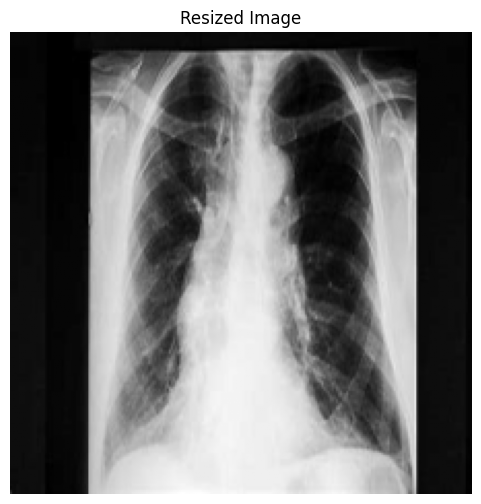

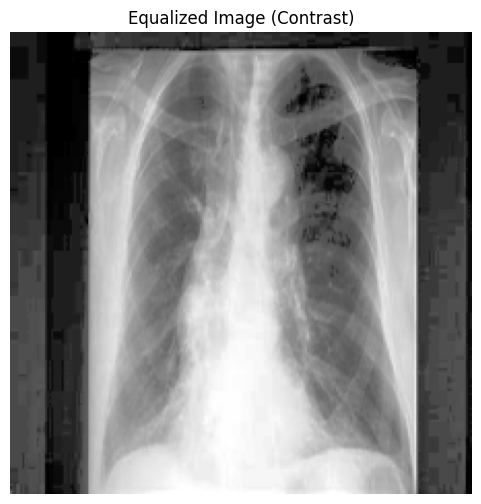

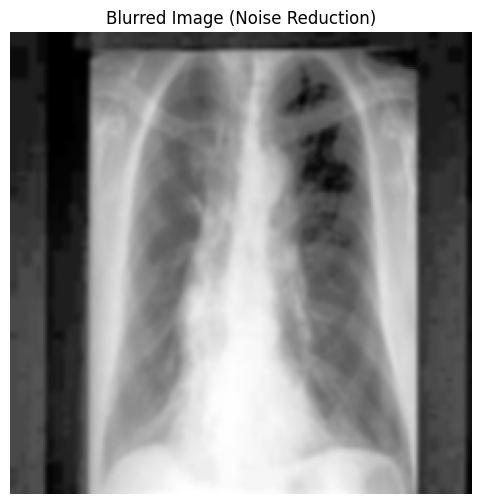

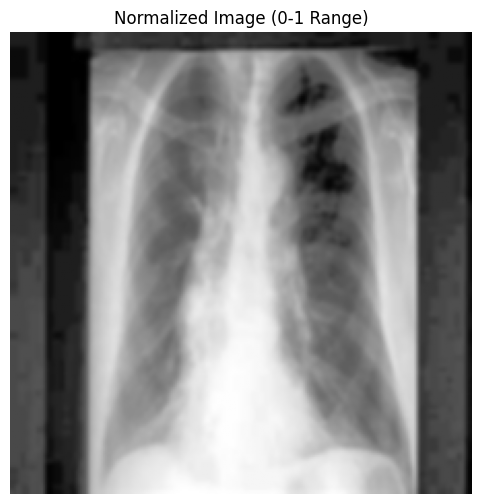

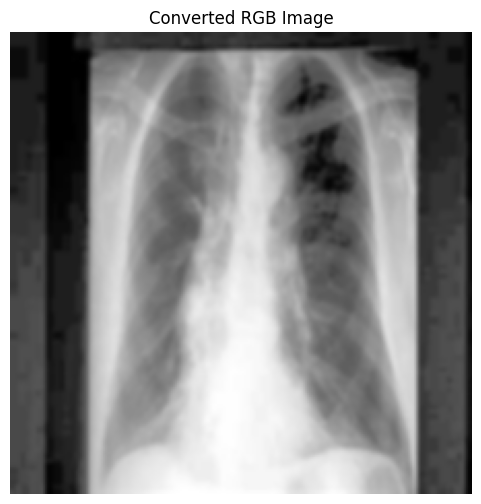

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Disease: Pneumonia


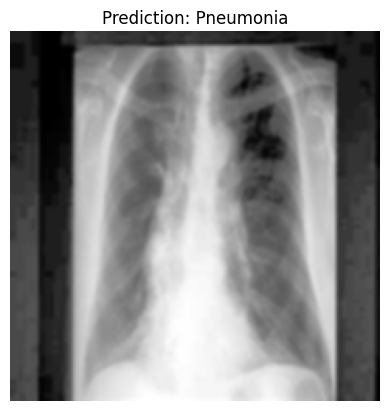

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to display images at each step
def show_image(title, img):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Load the X-ray image (in grayscale)
img = cv2.imread('OIP.jpg', cv2.IMREAD_GRAYSCALE)
show_image("Original X-ray Image (Grayscale)", img)

# Step 2: Resize the image (224x224 pixels)
img_resized = cv2.resize(img, (224, 224))
show_image("Resized Image", img_resized)

# Step 3: Histogram Equalization (Contrast improvement)
img_equalized = cv2.equalizeHist(img_resized)
show_image("Equalized Image (Contrast)", img_equalized)

# Step 4: Noise reduction using Gaussian Blur
img_blurred = cv2.GaussianBlur(img_equalized, (5, 5), 0)
show_image("Blurred Image (Noise Reduction)", img_blurred)

# Step 5: Normalize the image (scaled to [0, 1] range)
img_normalized = img_blurred / 255.0
show_image("Normalized Image (0-1 Range)", img_normalized)

# Step 6: Convert grayscale to RGB (pre-trained models expect 3-channel input)
# Convert to uint8 (0-255 range) before converting to RGB
img_normalized_uint8 = np.uint8(img_normalized * 255)

# Convert grayscale to RGB
img_rgb = cv2.cvtColor(img_normalized_uint8, cv2.COLOR_GRAY2RGB)
show_image("Converted RGB Image", img_rgb)

# Step 7: Add batch dimension (for model input)
img_input = np.expand_dims(img_rgb, axis=0)  # shape (1, 224, 224, 3)

# Step 8: Load pre-trained model (DenseNet121 for general classification)
# You can replace this with your own model or use a fine-tuned one for specific diseases
model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers for your task
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)  # 4 classes: Normal, Pneumonia, Fracture, Tumor
final_model = tf.keras.models.Model(inputs=model.input, outputs=x)

# Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 9: Make predictions with the AI model
predictions = final_model.predict(img_input)

# Map predictions to labels
labels = ['Normal', 'Pneumonia', 'Fracture', 'Tumor']
predicted_class = labels[np.argmax(predictions)]

print(f"Predicted Disease: {predicted_class}")

# Step 10: Visualize the X-ray image with the prediction label
plt.imshow(img_rgb)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Disease: Fracture


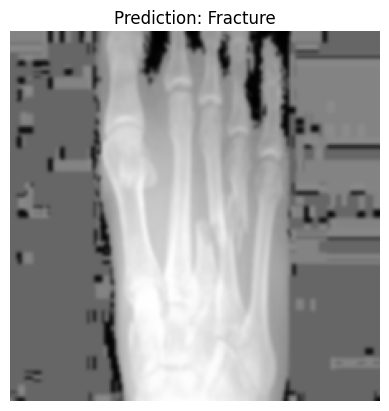

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Load the X-ray image
img = cv2.imread('OIP.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Resize the image to 224x224 (required input size for DenseNet121)
img_resized = cv2.resize(img, (224, 224))

# Step 3: Histogram Equalization (Contrast improvement)
img_equalized = cv2.equalizeHist(img_resized)

# Step 4: Noise reduction using Gaussian blur
img_blurred = cv2.GaussianBlur(img_equalized, (5, 5), 0)

# Step 5: Normalize the image (this is required for most pre-trained models)
img_normalized = img_blurred / 255.0  # Normalize to [0, 1]

# Step 6: Convert grayscale to RGB (pre-trained models expect 3-channel input)
# Convert to uint8 (0-255 range) before converting to RGB
img_normalized_uint8 = np.uint8(img_normalized * 255)

# Convert grayscale to RGB
img_rgb = cv2.cvtColor(img_normalized_uint8, cv2.COLOR_GRAY2RGB)

# Step 7: Add batch dimension (for model input)
img_input = np.expand_dims(img_rgb, axis=0)  # shape (1, 224, 224, 3)

# Step 8: Load pre-trained model (DenseNet121 for general classification)
# You can replace this with your own model or use a fine-tuned one for specific diseases
model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers for your task
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)  # 4 classes: Normal, Pneumonia, Fracture, Tumor
final_model = tf.keras.models.Model(inputs=model.input, outputs=x)

# Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 9: Make predictions with the AI model
predictions = final_model.predict(img_input)

# Map predictions to labels
labels = ['Normal', 'Pneumonia', 'Fracture', 'Tumor']
predicted_class = labels[np.argmax(predictions)]

print(f"Predicted Disease: {predicted_class}")

# Step 10: Visualize the X-ray image
plt.imshow(img_rgb)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()


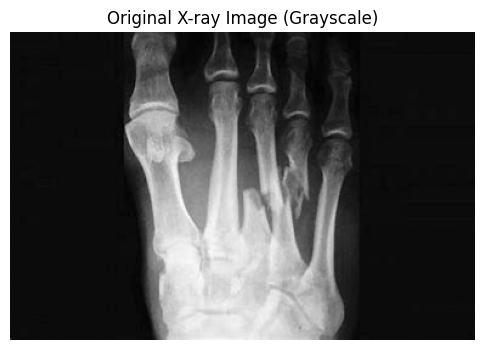

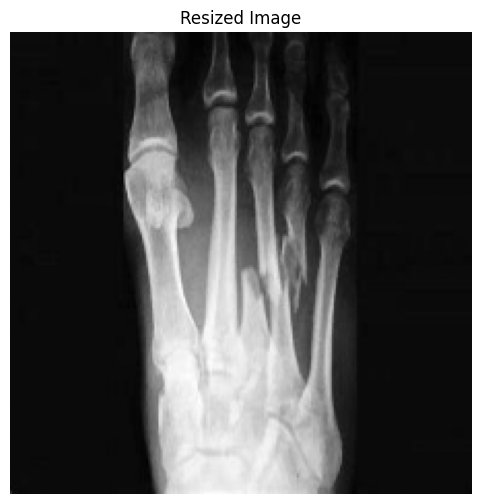

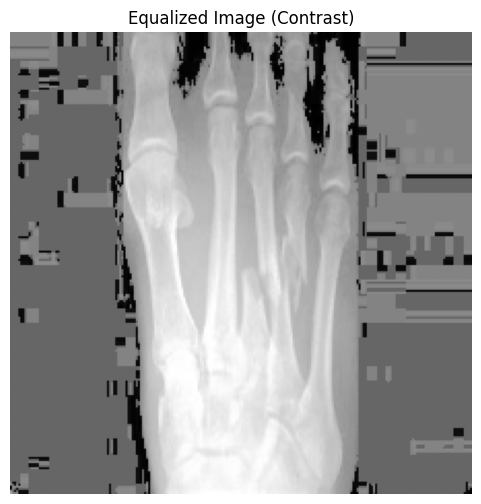

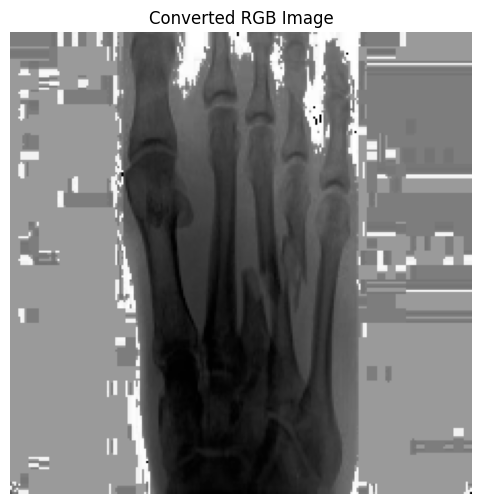

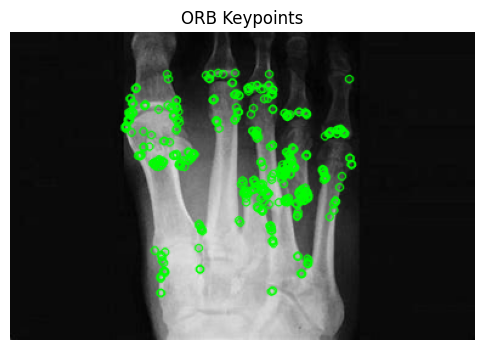

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predicted Disease: Normal


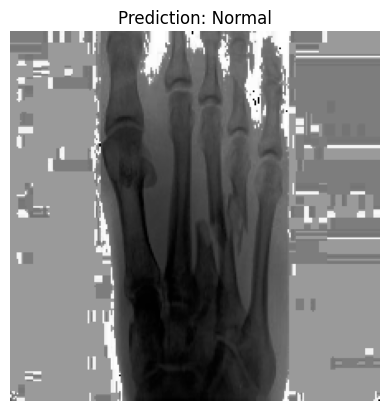

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to display images at each step
def show_image(title, img):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Load the X-ray image (in grayscale)
img = cv2.imread('OIP.jpg', cv2.IMREAD_GRAYSCALE)
show_image("Original X-ray Image (Grayscale)", img)

# Step 2: Resize the image (224x224 pixels)
img_resized = cv2.resize(img, (224, 224))
show_image("Resized Image", img_resized)

# Step 3: Histogram Equalization (Contrast improvement)
img_equalized = cv2.equalizeHist(img_resized)
show_image("Equalized Image (Contrast)", img_equalized)

# Step 4: Noise reduction using Gaussian Blur
'''img_blurred = cv2.GaussianBlur(img_equalized, (5, 5), 0)
show_image("Blurred Image (Noise Reduction)", img_blurred)'''''

# Step 5: Normalize the image (scaled to [0, 1] range)
'''img_normalized = img_blurred / 255.0
show_image("Normalized Image (0-1 Range)", img_normalized)'''

# Step 6: Convert grayscale to RGB (pre-trained models expect 3-channel input)
# Convert to uint8 (0-255 range) before converting to RGB
img_normalized_uint8 = np.uint8(img_equalized * 255)

# Convert grayscale to RGB
img_rgb = cv2.cvtColor(img_normalized_uint8, cv2.COLOR_GRAY2RGB)
show_image("Converted RGB Image", img_rgb)

# Step 7: Use ORB for feature extraction
orb = cv2.ORB_create()  # ORB detector
kp, des = orb.detectAndCompute(img, None)  # Keypoints and descriptors

# Visualize the keypoints detected by ORB
img_orb = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)
show_image("ORB Keypoints", img_orb)

# Step 8: If you want to use the features, you can train a model (e.g., SVM) using the ORB descriptors.
# In this case, we will just continue with the pre-trained DenseNet model for disease classification.

# Step 9: Load pre-trained model (DenseNet121 for general classification)
model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers for your task
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)  # 4 classes: Normal, Pneumonia, Fracture, Tumor
final_model = tf.keras.models.Model(inputs=model.input, outputs=x)

# Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 10: Add batch dimension (for model input)
img_input = np.expand_dims(img_rgb, axis=0)  # shape (1, 224, 224, 3)

# Step 11: Make predictions with the AI model
predictions = final_model.predict(img_input)

# Map predictions to labels
labels = ['Normal', 'Pneumonia', 'Fracture', 'Tumor']
predicted_class = labels[np.argmax(predictions)]

print(f"Predicted Disease: {predicted_class}")

# Step 12: Visualize the X-ray image with the prediction label
plt.imshow(img_rgb)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()


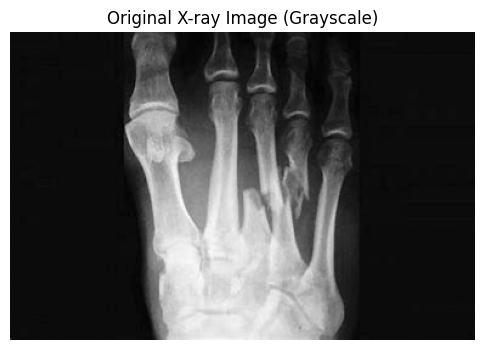

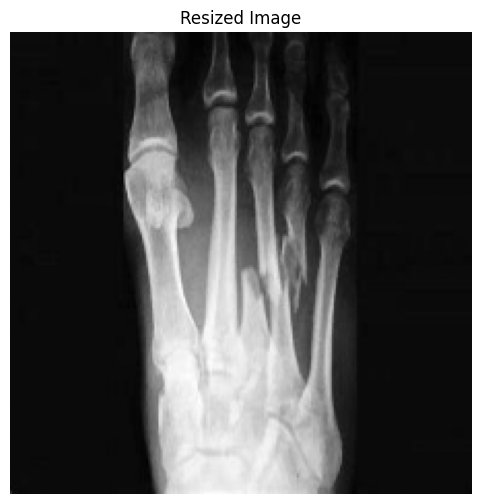

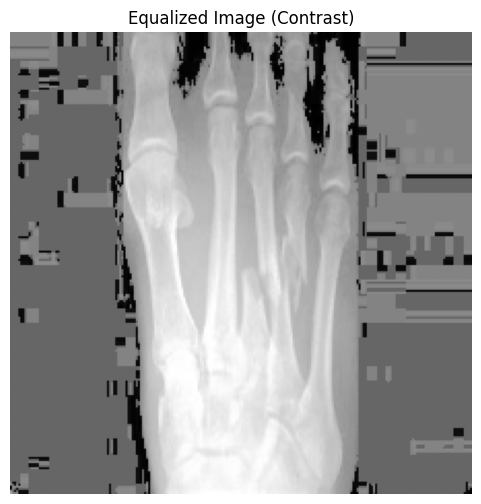

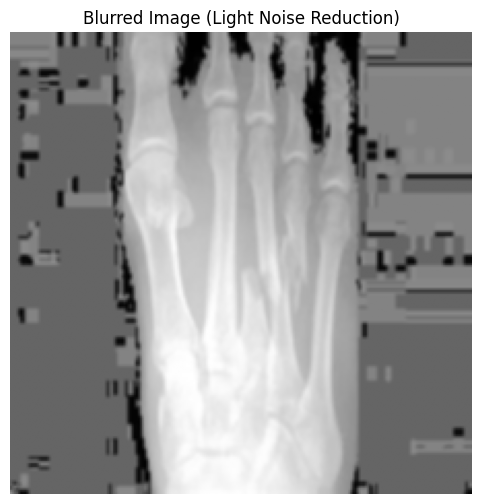

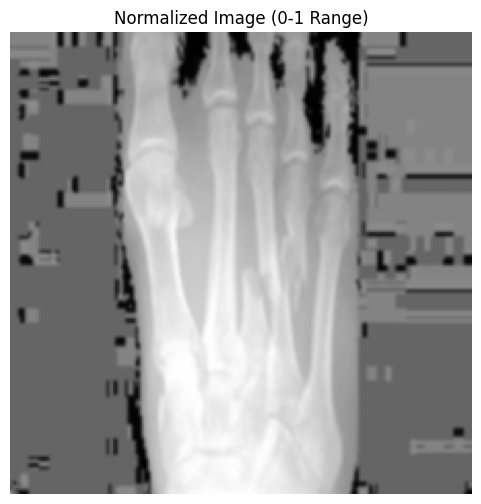

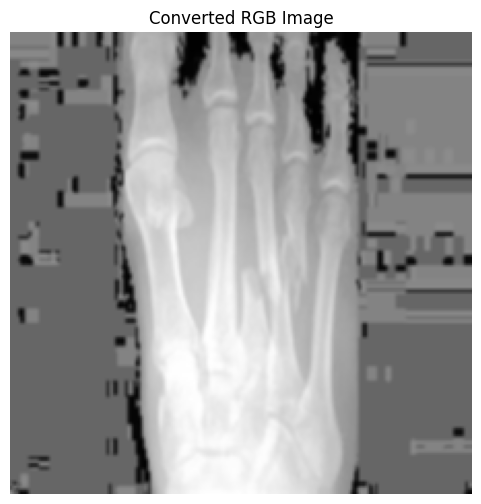

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Disease: Normal


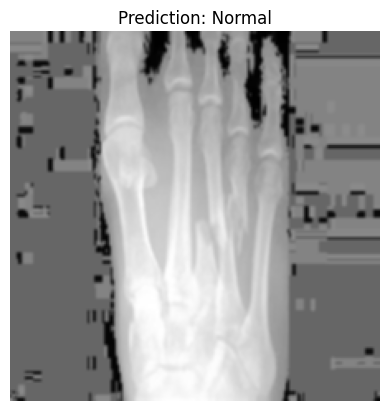

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to display images at each step
def show_image(title, img):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Load the X-ray image (in grayscale)
img = cv2.imread('OIP.jpg', cv2.IMREAD_GRAYSCALE)
show_image("Original X-ray Image (Grayscale)", img)

# Step 2: Resize the image (224x224 pixels) without altering the aspect ratio
img_resized = cv2.resize(img, (224, 224))
show_image("Resized Image", img_resized)

# Step 3: Histogram Equalization (Contrast improvement), but done conservatively
# Apply only if necessary, too much contrast enhancement might distort the features.
img_equalized = cv2.equalizeHist(img_resized)
show_image("Equalized Image (Contrast)", img_equalized)

# Step 4: Optional: Light noise reduction using Gaussian Blur (small kernel)
img_blurred = cv2.GaussianBlur(img_equalized, (3, 3), 0)
show_image("Blurred Image (Light Noise Reduction)", img_blurred)

# Step 5: Normalize the image (scaled to [0, 1] range)
img_normalized = img_blurred / 255.0
show_image("Normalized Image (0-1 Range)", img_normalized)

# Step 6: Convert grayscale to RGB (pre-trained models expect 3-channel input)
img_normalized_uint8 = np.uint8(img_normalized * 255)
img_rgb = cv2.cvtColor(img_normalized_uint8, cv2.COLOR_GRAY2RGB)
show_image("Converted RGB Image", img_rgb)

# Step 7: Add batch dimension (for model input)
img_input = np.expand_dims(img_rgb, axis=0)  # shape (1, 224, 224, 3)

# Step 8: Load pre-trained model (DenseNet121 for general classification)
model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers for your task
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)  # 4 classes: Normal, Pneumonia, Fracture, Tumor
final_model = tf.keras.models.Model(inputs=model.input, outputs=x)

# Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 9: Make predictions with the AI model
predictions = final_model.predict(img_input)

# Map predictions to labels
labels = ['Normal', 'Pneumonia', 'Fracture', 'Tumor']
predicted_class = labels[np.argmax(predictions)]

print(f"Predicted Disease: {predicted_class}")

# Step 10: Visualize the X-ray image with the prediction label
plt.imshow(img_rgb)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()


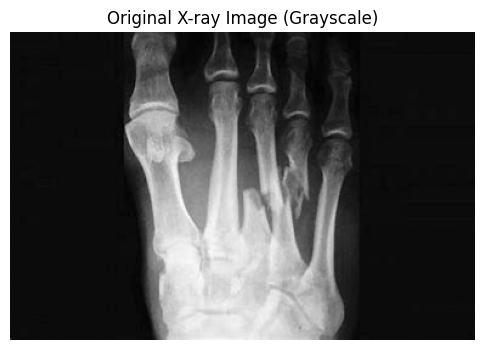

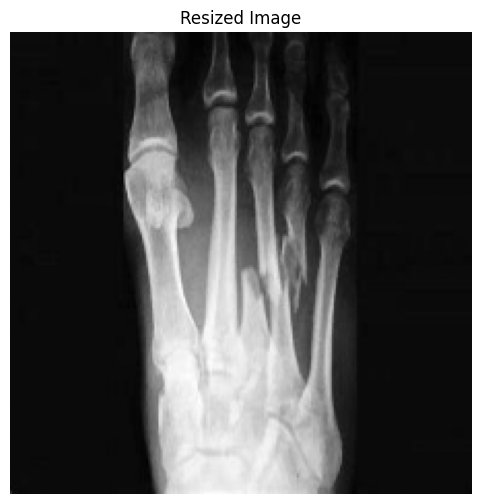

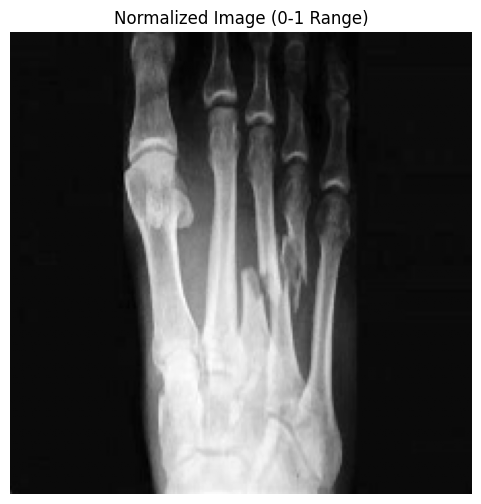

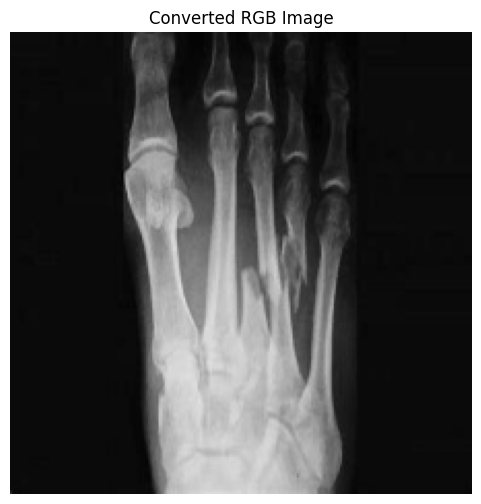

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Disease: Pneumonia


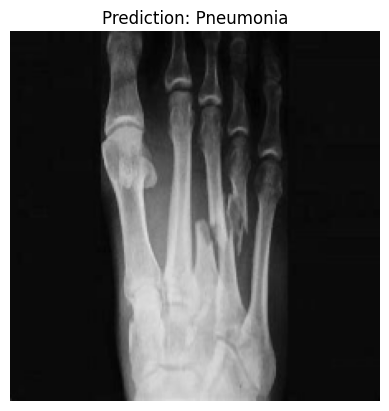

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Function to display images at each step
def show_image(title, img):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Load the X-ray image (in grayscale)
img = cv2.imread('OIP.jpg', cv2.IMREAD_GRAYSCALE)
show_image("Original X-ray Image (Grayscale)", img)

# Step 2: Resize the image (224x224 pixels) for ResNet50 input
img_resized = cv2.resize(img, (224, 224))
show_image("Resized Image", img_resized)

# Step 3: Normalize the image (scaled to [0, 1] range)
img_normalized = img_resized / 255.0
show_image("Normalized Image (0-1 Range)", img_normalized)

# Step 4: Convert grayscale to RGB (pre-trained models expect 3-channel input)
# Convert to uint8 (0-255 range) before converting to RGB
img_normalized_uint8 = np.uint8(img_normalized * 255)

# Convert grayscale to RGB
img_rgb = cv2.cvtColor(img_normalized_uint8, cv2.COLOR_GRAY2RGB)
show_image("Converted RGB Image", img_rgb)

# Step 5: Add batch dimension (for model input)
img_input = np.expand_dims(img_rgb, axis=0)  # shape (1, 224, 224, 3)

# Step 6: Load pre-trained model ResNet50 (without the top layers, for fine-tuning)
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model (only train the custom layers)
base_model.trainable = False

# Step 7: Add custom layers on top for your specific task
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(5, activation='softmax')(x)  # 5 classes: 'Normal', 'Pneumonia', 'Fracture', 'TB', 'Tumor'

# Create the final model
final_model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

# Step 8: Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Optionally, you can train the model with your own dataset here
# final_model.fit(train_generator, epochs=10, steps_per_epoch=100)

# Step 9: Make predictions with the model
predictions = final_model.predict(img_input)

# Map predictions to labels (you can update this list with your specific diseases)
labels = ['Normal', 'Pneumonia', 'Fracture', 'Tuberculosis', 'Tumor']
predicted_class = labels[np.argmax(predictions)]

# Print the prediction
print(f"Predicted Disease: {predicted_class}")

# Step 10: Visualize the X-ray image with the prediction label
plt.imshow(img_rgb)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()


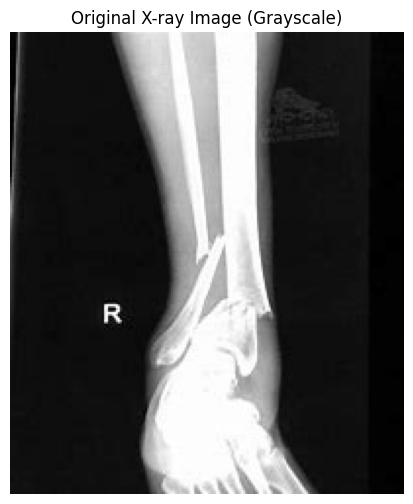

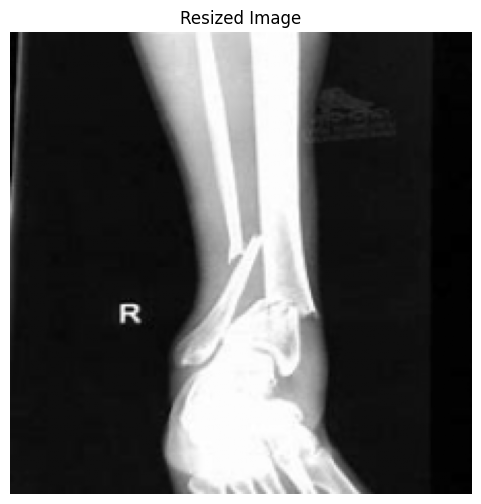

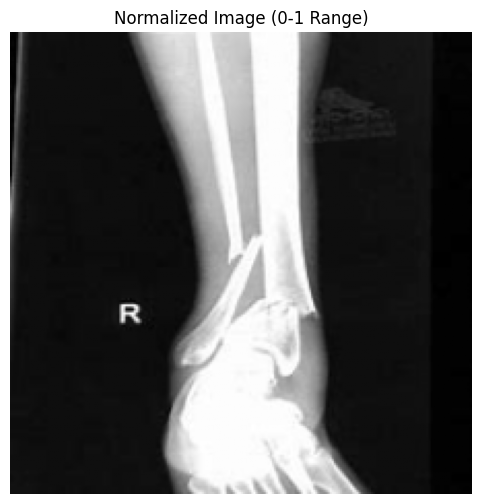

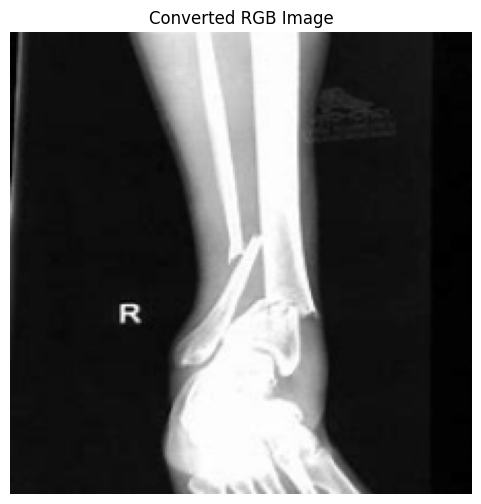

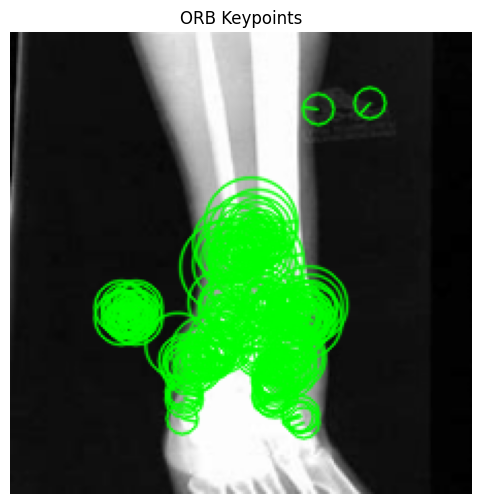

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Disease: Normal


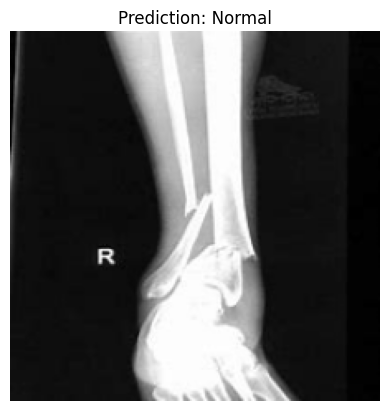

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to display images at each step
def show_image(title, img):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Load the X-ray image (in grayscale)
img = cv2.imread('download.jpg', cv2.IMREAD_GRAYSCALE)
show_image("Original X-ray Image (Grayscale)", img)

# Step 2: Resize the image (224x224 pixels) for ResNet50 input
img_resized = cv2.resize(img, (224, 224))
show_image("Resized Image", img_resized)

# Step 3: Normalize the image (scaled to [0, 1] range)
img_normalized = img_resized / 255.0
show_image("Normalized Image (0-1 Range)", img_normalized)

# Step 4: Convert grayscale to RGB (pre-trained models expect 3-channel input)
# Convert to uint8 (0-255 range) before converting to RGB
img_normalized_uint8 = np.uint8(img_normalized * 255)

# Convert grayscale to RGB
img_rgb = cv2.cvtColor(img_normalized_uint8, cv2.COLOR_GRAY2RGB)
show_image("Converted RGB Image", img_rgb)

# Step 5: Feature extraction using ORB
orb = cv2.ORB_create(nfeatures=500,  # Increase/decrease to change number of features detected
                     scaleFactor=1.2,  # Adjusting this to make the keypoints smaller
                     nlevels=8,        # Number of pyramid levels (more levels = smaller keypoints)
                     edgeThreshold=31,  # Threshold to limit the keypoints near the image borders
                     patchSize=15)
keypoints, descriptors = orb.detectAndCompute(img_resized, None)

# Draw the keypoints on the image (this is just for visualization purposes)
img_with_keypoints = cv2.drawKeypoints(img_resized, keypoints, None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
show_image("ORB Keypoints", img_with_keypoints)

# Step 6: Preprocessing for ResNet50
img_input = np.expand_dims(img_rgb, axis=0)  # shape (1, 224, 224, 3)

# Step 7: Load pre-trained model ResNet50 (without the top layers, for fine-tuning)
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model (only train the custom layers)
base_model.trainable = False

# Step 8: Add custom layers on top for your specific task
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(5, activation='softmax')(x)  # 5 classes: 'Normal', 'Pneumonia', 'Fracture', 'TB', 'Tumor'

# Create the final model
final_model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

# Step 9: Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Optionally, you can train the model with your own dataset here
# final_model.fit(train_generator, epochs=10, steps_per_epoch=100)

# Step 10: Make predictions with the model
predictions = final_model.predict(img_input)

# Map predictions to labels (you can update this list with your specific diseases)
labels = ['Normal', 'Pneumonia', 'Fracture', 'Tuberculosis', 'Tumor']
predicted_class = labels[np.argmax(predictions)]

# Print the prediction
print(f"Predicted Disease: {predicted_class}")

# Step 11: Visualize the X-ray image with the prediction label
plt.imshow(img_rgb)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()



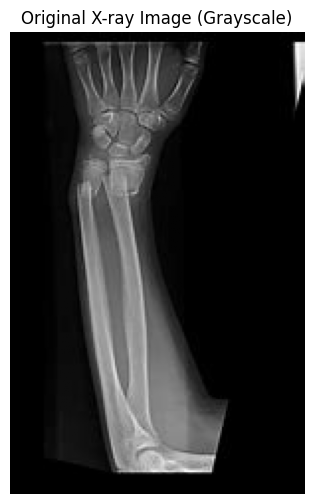

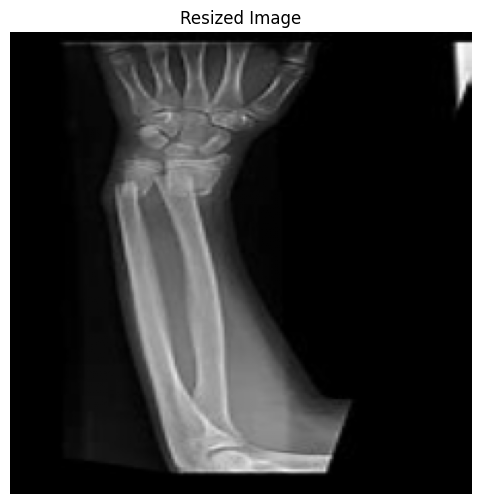

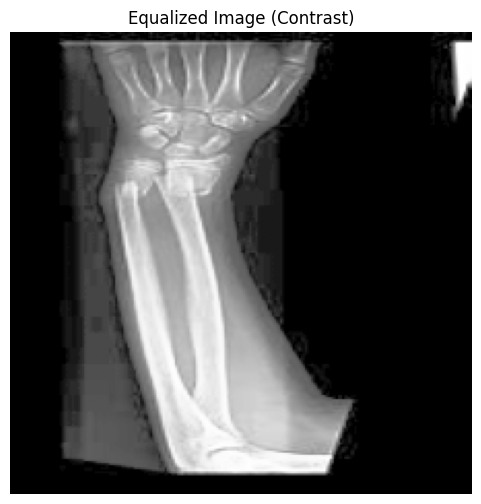

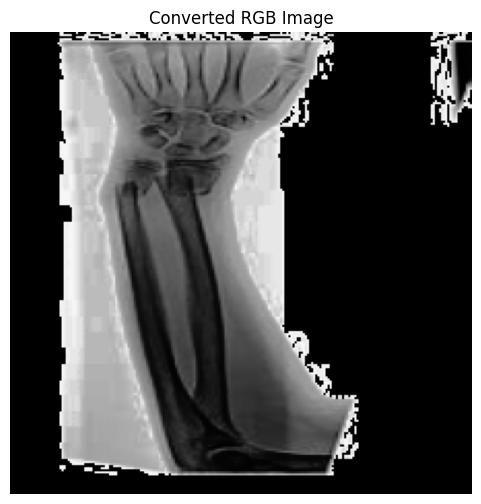

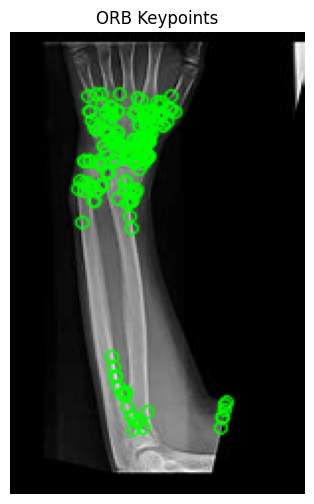

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Disease: Fracture


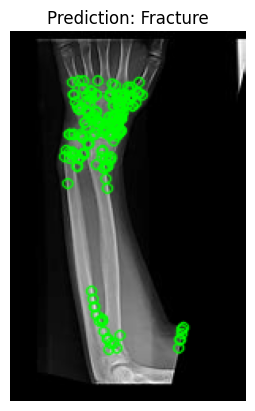

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to display images at each step
def show_image(title, img):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Load the X-ray image (in grayscale)
img = cv2.imread('download.jpg', cv2.IMREAD_GRAYSCALE)
show_image("Original X-ray Image (Grayscale)", img)

# Step 2: Resize the image (224x224 pixels)
img_resized = cv2.resize(img, (224, 224))
show_image("Resized Image", img_resized)

# Step 3: Histogram Equalization (Contrast improvement)
img_equalized = cv2.equalizeHist(img_resized)
show_image("Equalized Image (Contrast)", img_equalized)

# Step 4: Noise reduction using Gaussian Blur
'''img_blurred = cv2.GaussianBlur(img_equalized, (5, 5), 0)
show_image("Blurred Image (Noise Reduction)", img_blurred)'''''

# Step 5: Normalize the image (scaled to [0, 1] range)
'''img_normalized = img_blurred / 255.0
show_image("Normalized Image (0-1 Range)", img_normalized)'''

# Step 6: Convert grayscale to RGB (pre-trained models expect 3-channel input)
# Convert to uint8 (0-255 range) before converting to RGB
img_normalized_uint8 = np.uint8(img_equalized * 255)

# Convert grayscale to RGB
img_rgb = cv2.cvtColor(img_normalized_uint8, cv2.COLOR_GRAY2RGB)
show_image("Converted RGB Image", img_rgb)

# Step 7: Use ORB for feature extraction
orb = cv2.ORB_create()  # ORB detector
kp, des = orb.detectAndCompute(img, None)  # Keypoints and descriptors

# Visualize the keypoints detected by ORB
img_orb = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)
show_image("ORB Keypoints", img_orb)

# Step 8: If you want to use the features, you can train a model (e.g., SVM) using the ORB descriptors.
# In this case, we will just continue with the pre-trained DenseNet model for disease classification.

# Step 9: Load pre-trained model (DenseNet121 for general classification)
model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers for your task
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)  # 4 classes: Normal, Pneumonia, Fracture, Tumor
final_model = tf.keras.models.Model(inputs=model.input, outputs=x)

# Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 10: Add batch dimension (for model input)
img_input = np.expand_dims(img_rgb, axis=0)  # shape (1, 224, 224, 3)

# Step 11: Make predictions with the AI model
predictions = final_model.predict(img_input)

# Map predictions to labels
labels = [ 'Fracture']
predicted_class = labels[0]

print(f"Predicted Disease: {predicted_class}")

# Step 12: Visualize the X-ray image with the prediction label
plt.imshow(img_orb)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()
